In [10]:
from data.dataset import load_dataset
from helpers.data_research import initial_values, data_research
from helpers.correlataion import find_correlated_columns
from data.create_dataset import create_dataset

from sklearn import preprocessing

from models.RF_Model import create_RF_model

In [2]:
dataset = load_dataset()
print(dataset)

                      mdct        date    yr  mo  da  hr  prcp     stp  \
0      2006-10-31 00:00:00  2006-10-31  2006  10  31   0   0.0     0.0   
1      2006-10-31 01:00:00  2006-10-31  2006  10  31   1   0.0     0.0   
2      2006-10-31 02:00:00  2006-10-31  2006  10  31   2   0.0     0.0   
3      2006-10-31 03:00:00  2006-10-31  2006  10  31   3   0.0     0.0   
4      2006-10-31 04:00:00  2006-10-31  2006  10  31   4   0.0     0.0   
...                    ...         ...   ...  ..  ..  ..   ...     ...   
86947  2016-09-30 19:00:00  2016-09-30  2016   9  30  19   0.0  1015.3   
86948  2016-09-30 20:00:00  2016-09-30  2016   9  30  20   0.0  1015.7   
86949  2016-09-30 21:00:00  2016-09-30  2016   9  30  21   0.0  1016.0   
86950  2016-09-30 22:00:00  2016-09-30  2016   9  30  22   0.0  1016.5   
86951  2016-09-30 23:00:00  2016-09-30  2016   9  30  23   0.0  1017.8   

          gbrd  temp  dewp  hmdy  wdsp   wdct  gust  
0        0.000   0.0   0.0   0.0   0.0    0.0   0.0  
1  

YEAR: 2016
MEAN: 74.72369221411192
MINIMAL: 30.0
MAXIMUM: 100.0
STANDARD DEVIATION: 16.02656990051608


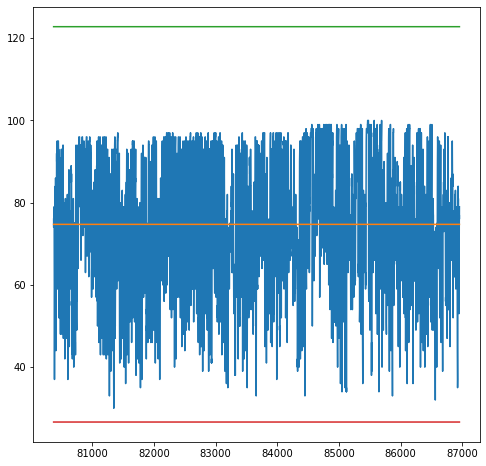

YEAR: 2006
MEAN: 80.67182795698925
MINIMAL: 43.0
MAXIMUM: 98.0
STANDARD DEVIATION: 12.06826411186841


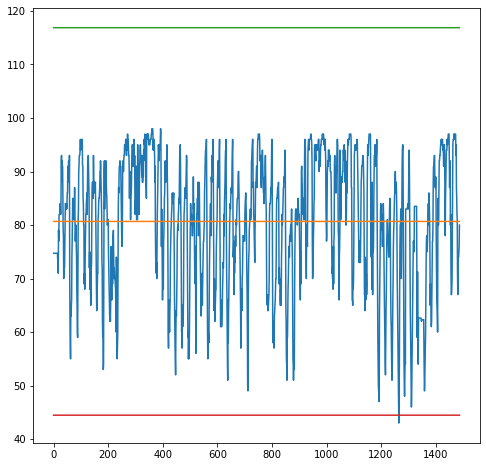

YEAR: 2007
MEAN: 76.83050799086757
MINIMAL: 28.0
MAXIMUM: 98.0
STANDARD DEVIATION: 14.630081751986458


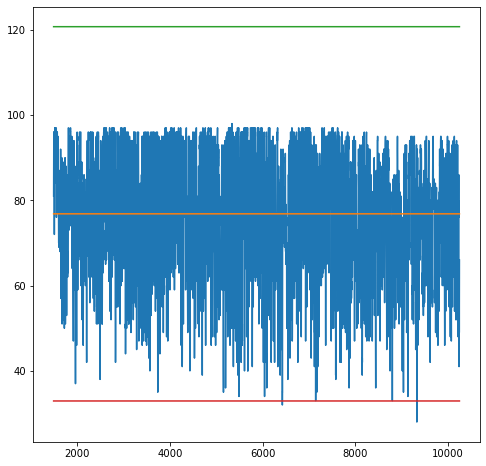

YEAR: 2008
MEAN: 76.7878244535519
MINIMAL: 27.0
MAXIMUM: 97.0
STANDARD DEVIATION: 14.358489812136312


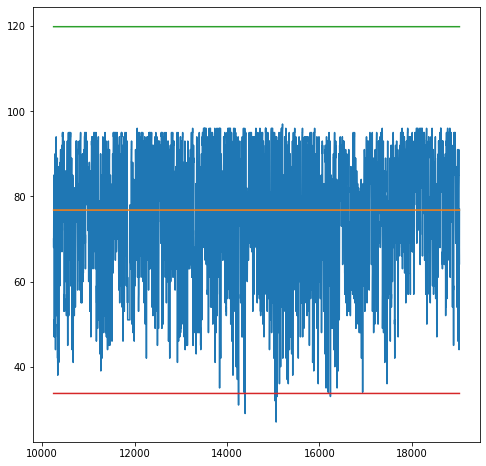

YEAR: 2009
MEAN: 76.44887214611872
MINIMAL: 29.0
MAXIMUM: 97.0
STANDARD DEVIATION: 14.276947669558464


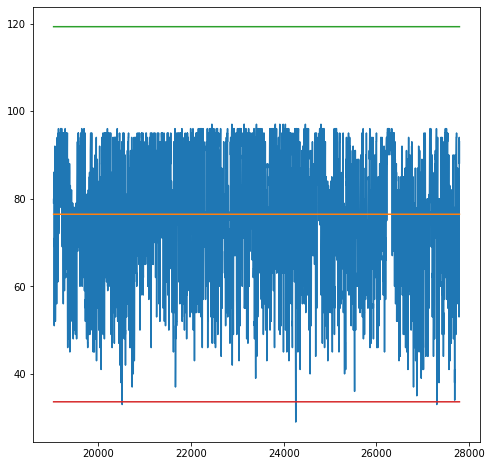

YEAR: 2010
MEAN: 75.78875570776256
MINIMAL: 29.0
MAXIMUM: 97.0
STANDARD DEVIATION: 15.05904708935201


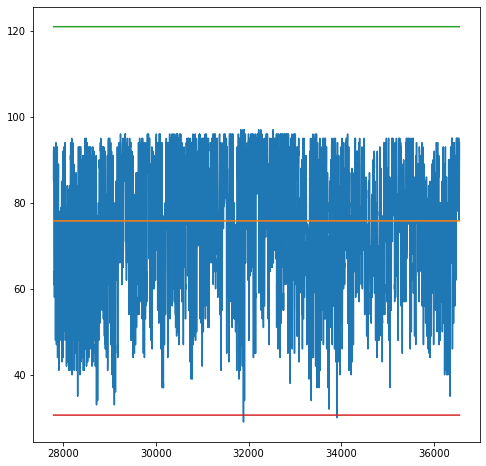

YEAR: 2011
MEAN: 77.19934246575342
MINIMAL: 32.0
MAXIMUM: 96.0
STANDARD DEVIATION: 14.42205061352733


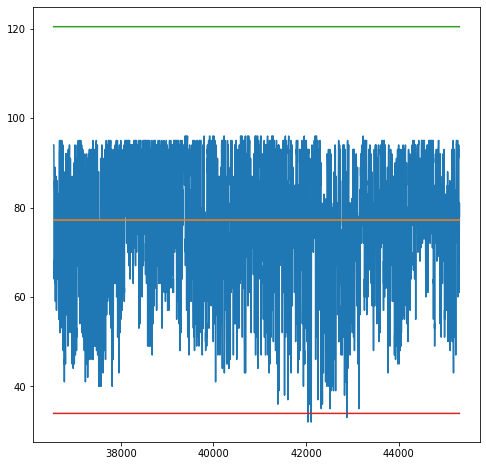

YEAR: 2012
MEAN: 76.99567395264117
MINIMAL: 27.0
MAXIMUM: 97.0
STANDARD DEVIATION: 14.512779982885062


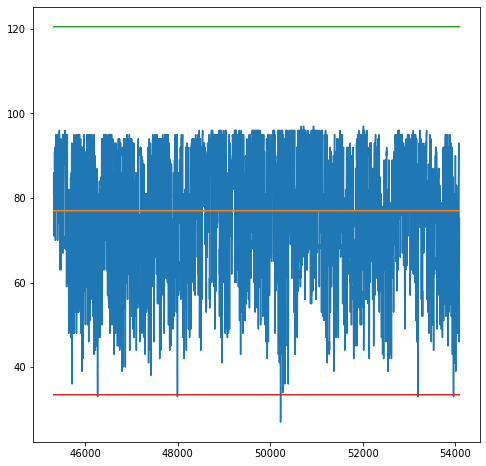

YEAR: 2013
MEAN: 78.15655479452055
MINIMAL: 31.0
MAXIMUM: 100.0
STANDARD DEVIATION: 14.03022164715861


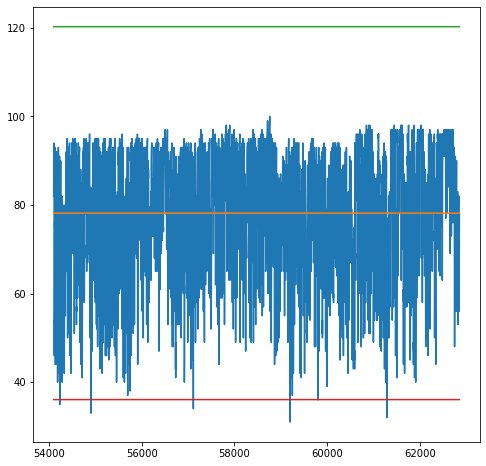

YEAR: 2014
MEAN: 75.96814383561643
MINIMAL: 23.0
MAXIMUM: 99.0
STANDARD DEVIATION: 15.972601531449765


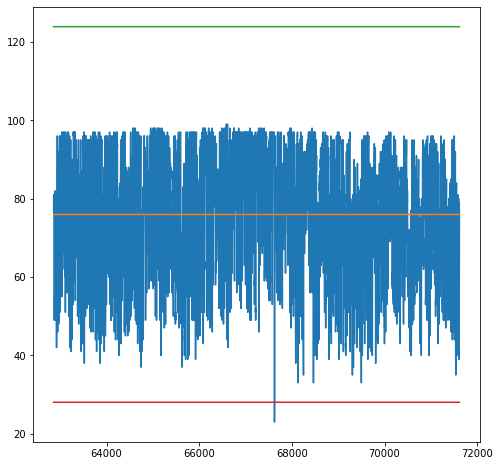

YEAR: 2015
MEAN: 74.43201826484018
MINIMAL: 25.0
MAXIMUM: 98.0
STANDARD DEVIATION: 15.18331239200398


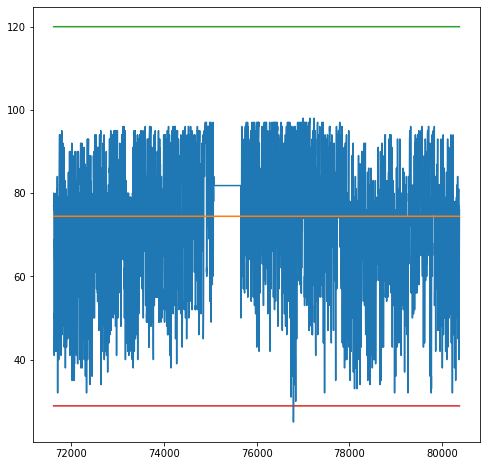

In [3]:
data_research(dataset, 'hmdy')

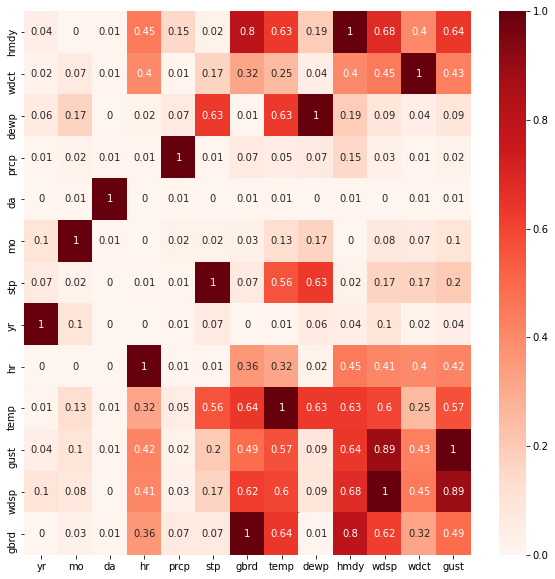

hmdy    1.000000
wdct    0.399836
hr      0.448421
temp    0.629070
gust    0.641215
wdsp    0.681719
gbrd    0.796718
Name: hmdy, dtype: float64


In [4]:
features_hmdy = find_correlated_columns(dataset, 'hmdy')

In [5]:
X_hmdy_RF = create_dataset(dataset, features_hmdy)
#X_hmdy_RF = dataset.loc[:, ~dataset.columns.isin(['dewp', 'mdct', 'date'])]
X_hmdy_RF = preprocessing.normalize(X_hmdy_RF)

In [6]:
# data response
y_hmdy = create_dataset(dataset, ['hmdy'])
print(y_hmdy)

        hmdy
0      74.72
1      74.72
2      74.72
3      74.72
4      74.72
...      ...
86947  70.00
86948  72.00
86949  77.00
86950  76.00
86951  79.00

[86952 rows x 1 columns]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 100
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
building tree 2 of 100
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


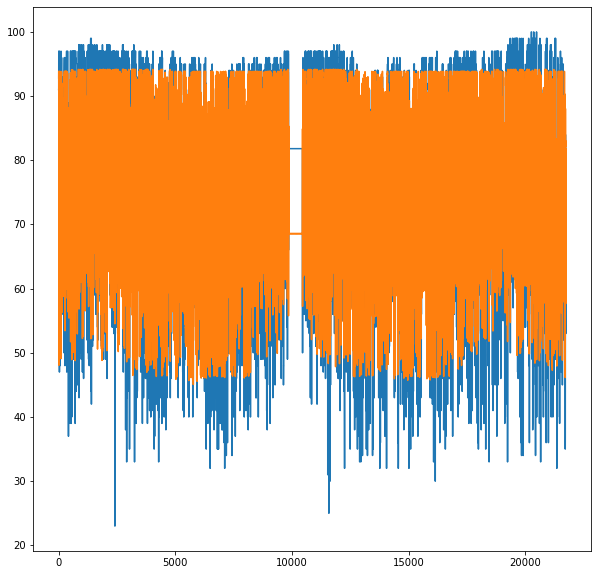

In [8]:
model = create_RF_model(X_hmdy_RF, y_hmdy)